In [ ]:
# A brief about problem statement

In [ ]:
'''
Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.

Evaluation Metric
The evaluation metric for this competition is 100*RMSLE where RMSLE is Root of Mean Squared Logarithmic Error across all entries in the test set.
'''

In [ ]:
# Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [ ]:
# Loading train data

In [2]:
dfa=pd.read_csv("C://Users//acer//Desktop//1sem//python//Food Demand//train//train.csv")
dfb=pd.read_csv("C://Users//acer//Desktop//1sem//python//Food Demand//train//meal_info.csv")
dfc=pd.read_csv("C://Users//acer//Desktop//1sem//python//Food Demand//train//fulfilment_center_info.csv")

In [ ]:
# Lets see what we have in train dataset

In [4]:
dfa.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189


In [8]:
dfa.shape

(456548, 9)

In [5]:
dfb.head(3)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai


In [9]:
dfb.shape

(51, 3)

In [6]:
dfc.head(3)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0


In [10]:
dfc.shape

(77, 5)

In [ ]:
# We will merge these 3 dataset on common columns

In [3]:
df=pd.merge(dfa,dfb,on="meal_id")

In [12]:
df.shape

(456548, 11)

In [4]:
df=pd.merge(df,dfc,on="center_id")

In [15]:
df.shape

(456548, 15)

In [ ]:
# Lets look at the combined dataset

In [16]:
df.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
# shape of dataset

In [18]:
df.shape

(456548, 15)

In [ ]:
# Listing all columns

In [19]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [ ]:
# detailed summary of dataset

In [20]:
pd.DataFrame({"TotalMissing":df.isna().sum(),"%Missing":df.isna().mean(),"DataType":df.dtypes,"Unique":df.nunique()})

,TotalMissing,%Missing,DataType,Unique
id,0,0.0,int64,456548
week,0,0.0,int64,145
center_id,0,0.0,int64,77
meal_id,0,0.0,int64,51
checkout_price,0,0.0,float64,1992
base_price,0,0.0,float64,1907
emailer_for_promotion,0,0.0,int64,2
homepage_featured,0,0.0,int64,2
num_orders,0,0.0,int64,1250
category,0,0.0,object,14


In [ ]:
'''
Dataset is quiet clean and need only some preprocessing
'''

In [ ]:
# Basic stats value

In [21]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
# EDA

In [ ]:
# Lets plot histogram of each varibale to see its distribution

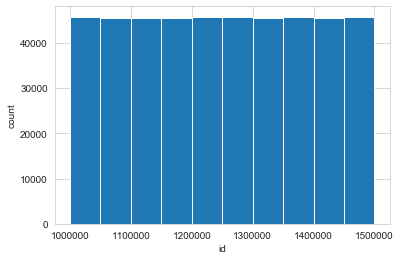

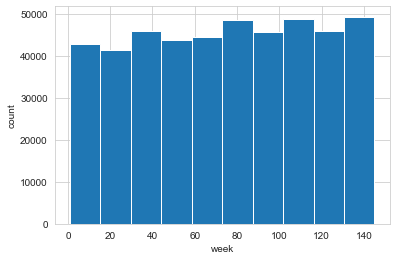

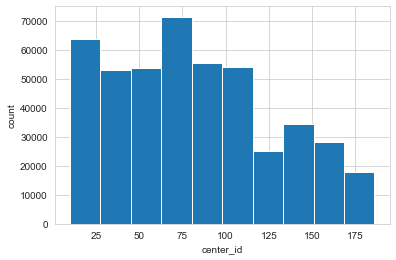

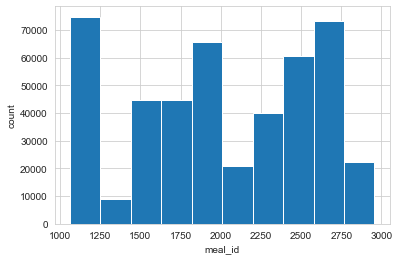

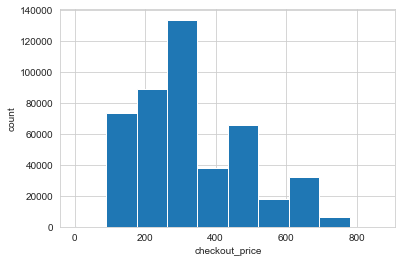

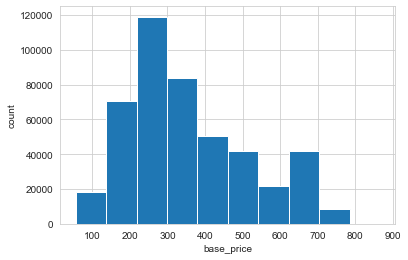

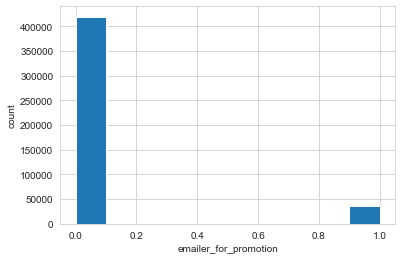

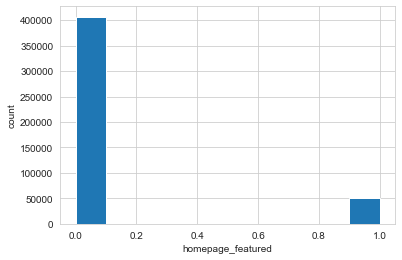

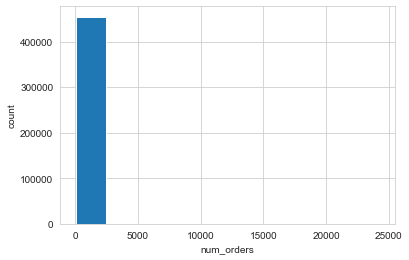

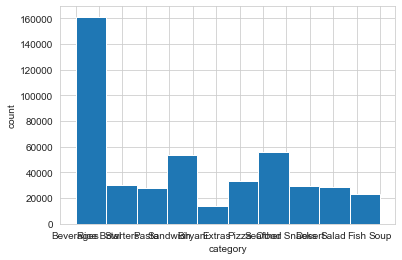

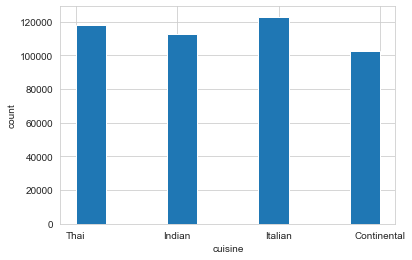

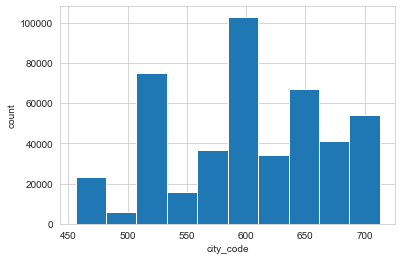

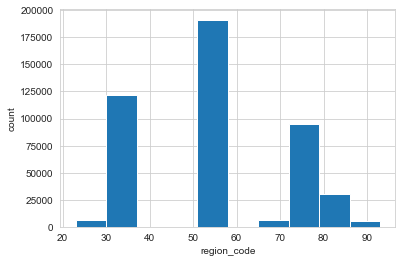

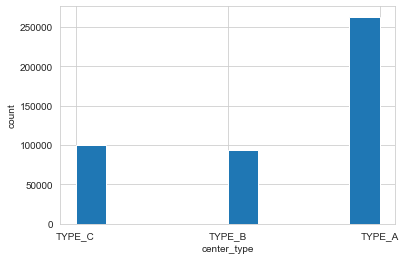

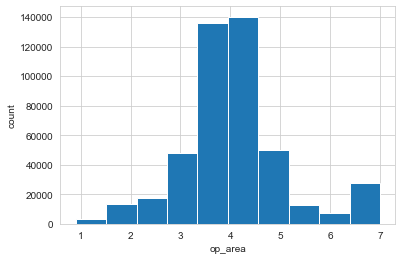

In [29]:
for features in df.columns:
    df[features].hist()
    plt.xlabel(features)
    plt.ylabel("count")
    plt.show()

In [ ]:
# Lets analysze target column

In [33]:
df.num_orders.describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [ ]:
# data is skewed as we have a difference in mean and median,lets visualize it

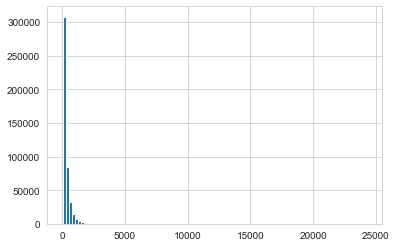

In [37]:
df.num_orders.hist(bins=100)

In [ ]:
# we can easily say that it has outliers as max order is very high 

In [ ]:
# Lets see num orders by week

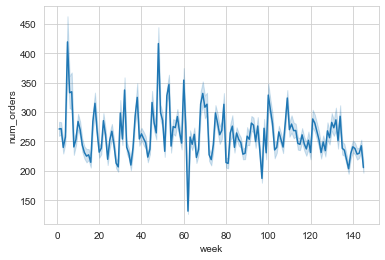

In [6]:
fig=sns.lineplot(df["week"],df["num_orders"])
plt.savefig("food-week.png")

In [ ]:
'''
We can see the ups and down during different weeks 
'''

In [ ]:
# Lets see meal id

In [8]:
df.meal_id.unique()

array([1885, 1993, 2539, 2139, 2631, 1248, 1778, 1062, 2707, 1207, 1230,
       2322, 2290, 1727, 1109, 2640, 2306, 2126, 2826, 1754, 1971, 1902,
       1311, 1803, 1558, 2581, 1962, 1445, 2444, 2867, 1525, 2704, 2304,
       2577, 1878, 1216, 1247, 1770, 1198, 2760, 2492, 1543, 2664, 2569,
       2490, 1571, 2956, 1438, 2494, 1847, 2104], dtype=int64)

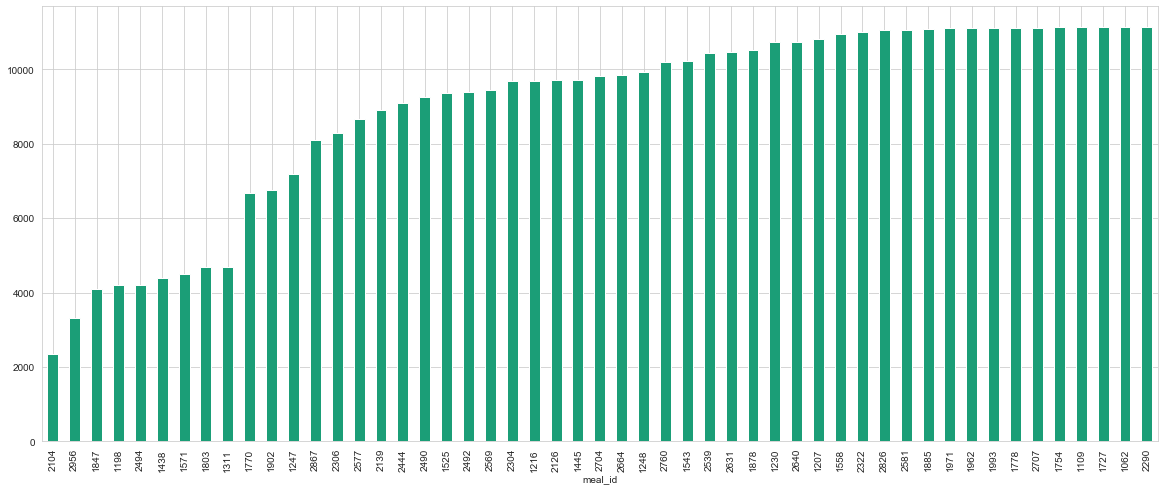

In [34]:
fig=plt.figure(figsize=(20,8))
df.groupby("meal_id")["num_orders"].size().sort_values().plot.bar(colormap="Dark2")
plt.savefig("food-mealid&orders.png")

In [ ]:
# We can see some meals are less in demand and whereas most meals are in high demand

In [ ]:
# center id

In [36]:
df.center_id.unique()

array([ 55,  24,  11,  83,  32,  13, 109,  52,  93, 186, 146,  57, 149,
        89, 124, 152,  97,  74, 108,  99,  66,  94,  91,  20,  34, 137,
        92, 126,  36, 162,  75, 177,  27, 157, 106,  64, 129,  14,  17,
       153, 139, 161,  81,  26,  73,  50, 104,  42, 113, 145,  53,  72,
        67, 174,  29,  77,  41,  30,  76,  59,  88, 143,  58,  10, 101,
        80,  43,  65,  39, 102, 110, 132,  23,  86,  68,  51,  61],
      dtype=int64)

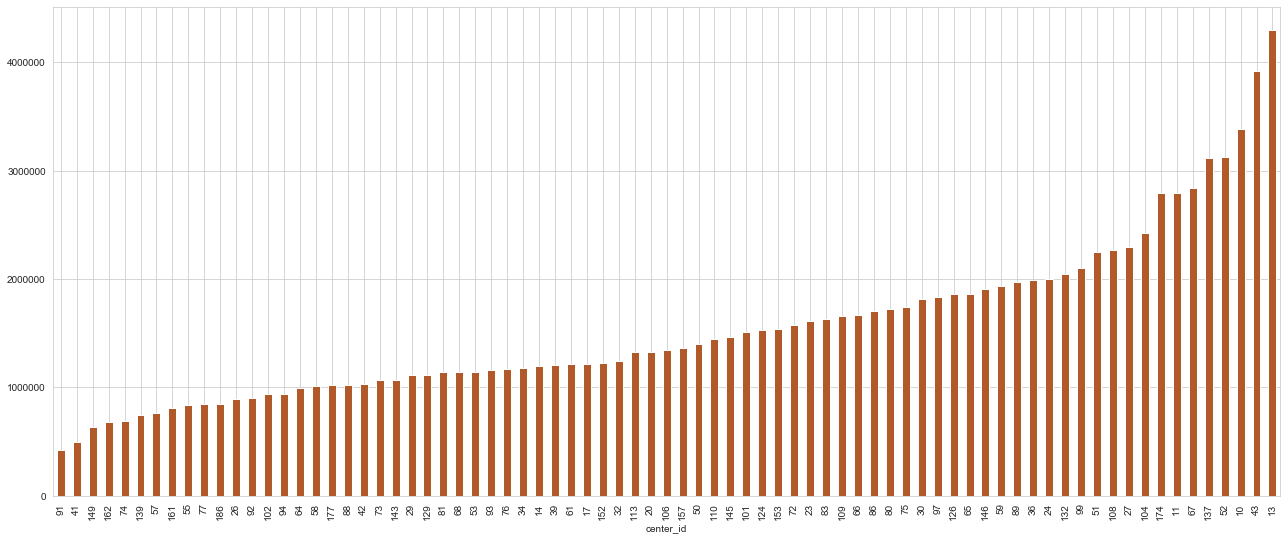

In [50]:
fig=plt.figure(figsize=(22,9))
centbar=df.groupby("center_id")["num_orders"].sum().sort_values()
centbar.plot(kind="bar",colormap="Paired_r")
plt.savefig("food-centbar.png")

In [ ]:
'''
we can see center id 91 has min orders and center id 13 has max orders, also we can cluster some high some center under one cluster
having high num orders like 137,52,43,13. We can also cluster some centers as less num orders like 91,41,149,162,74...and many.
'''

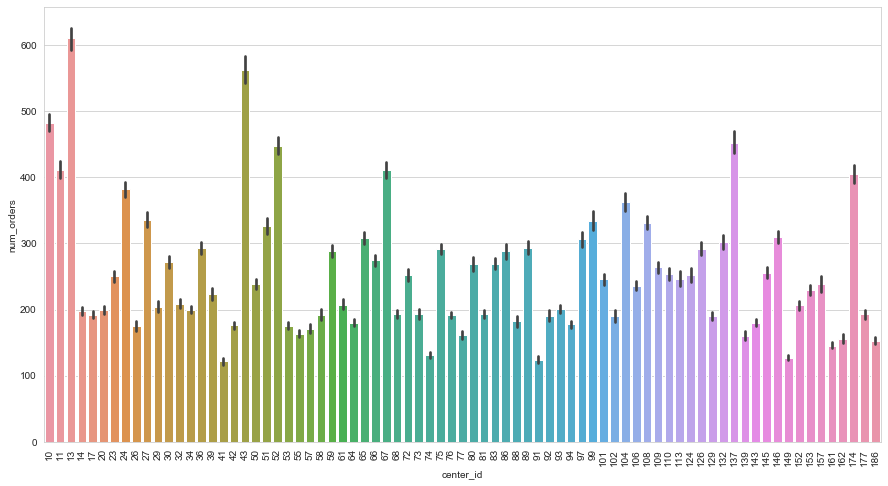

In [56]:
fig=plt.figure(figsize=(15,8))
sns.barplot(df['center_id'],df['num_orders'])
plt.xticks(rotation=90)
plt.savefig("food-center-count of orders.png")

In [ ]:
'''
we can see the count of orders taken by different centers
'''

In [ ]:
# checkout price

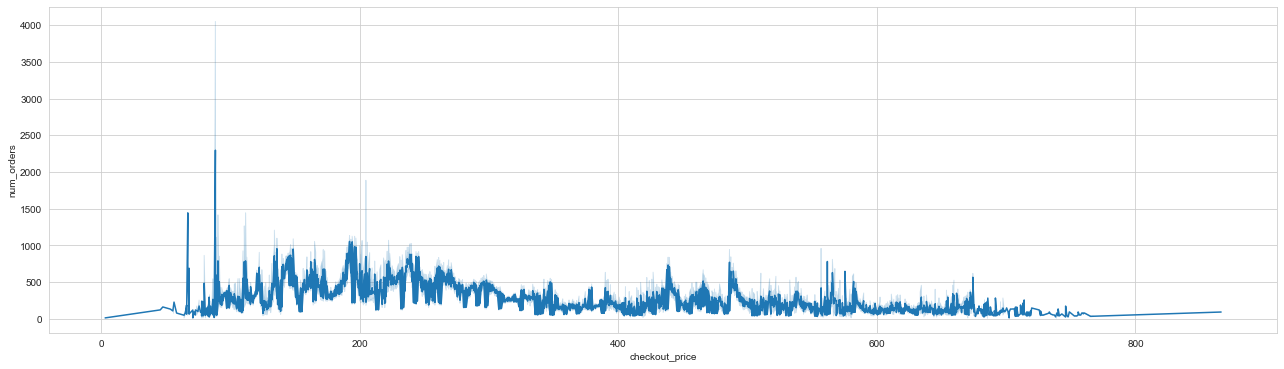

In [57]:
fig=plt.figure(figsize=(22,6))
sns.lineplot(df['checkout_price'],df['num_orders'])
plt.savefig("food-out-orders.png")

In [60]:
df.checkout_price.min(),df.checkout_price.max()  # range of checkout price

(2.97, 866.27)

In [ ]:
'''
We can say that checkout price above 300 approx was less in demand as ppl have placed less orders whose price>300. we can see some
spikes between 400 and 600 but it is less as compared to price range 2-300.
'''

In [ ]:
# category

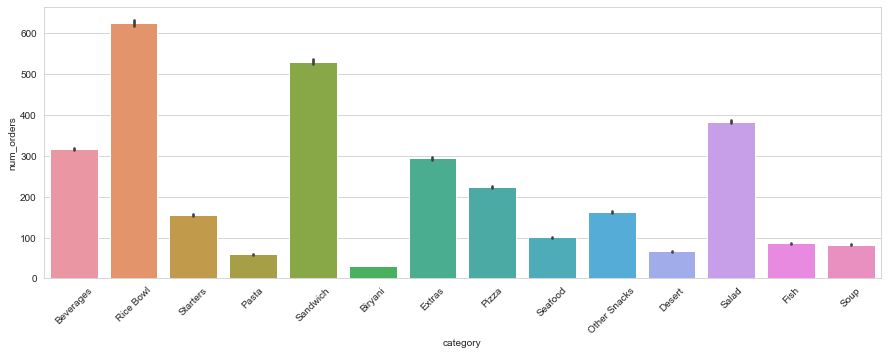

In [62]:
fig=plt.figure(figsize=(15,5))
sns.barplot(df['category'],df['num_orders'])
plt.xticks(rotation = '45')
plt.savefig("food-cat-orders.png")

In [ ]:
'''
Ppl prefer rice,sandwich and salad as compared to other meals
'''

In [ ]:
# base price

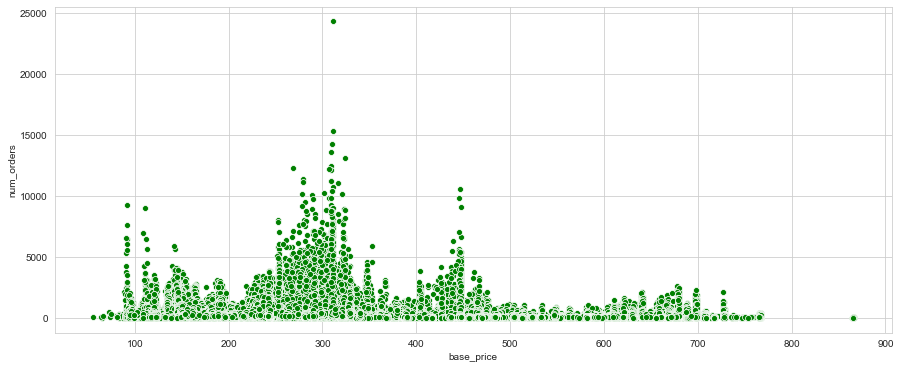

In [76]:
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x="base_price",y="num_orders",data=df,color="green")
plt.savefig("food-base-orders.png")

In [ ]:
'''
we can easily see that point above 20000 and right to 800 is indicating outlier. most of orders have a price in range 250-330
'''

In [ ]:
# emailer_for_promotion

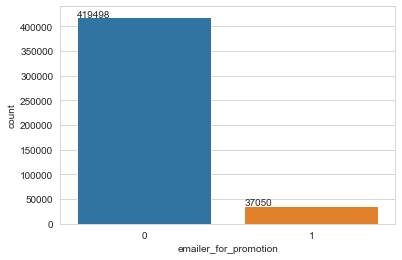

In [83]:
fig=sns.countplot(df["emailer_for_promotion"])
for i in fig.patches:
    fig.annotate((i.get_height()),(i.get_x(),i.get_height()))
plt.savefig("food-email.png")

In [ ]:
# Cuisine

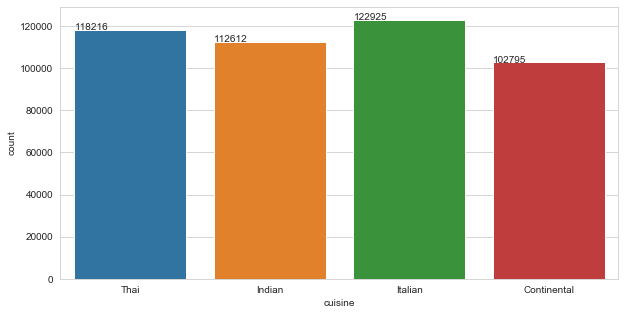

In [88]:
figure=plt.figure(figsize=(10,5))
fig=sns.countplot(x="cuisine",data=df)
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("food-cuisine.png")

In [ ]:
'''
Ppl prefer eating Italian as compared to other cuisine
'''

In [ ]:
# city code

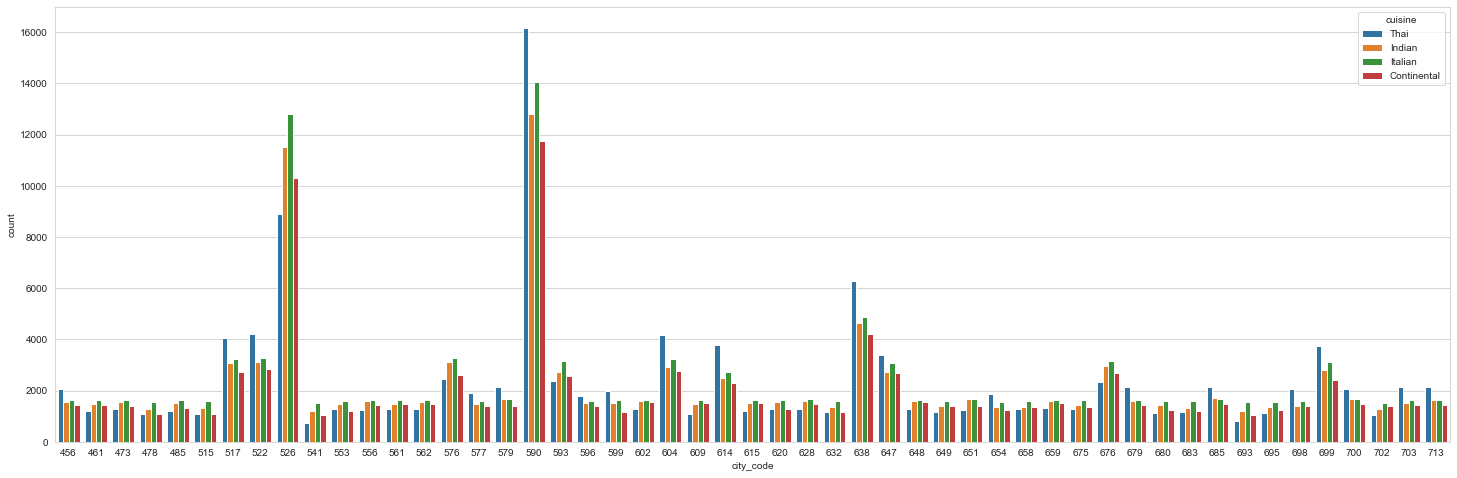

In [93]:
fig=plt.figure(figsize=(25,8))
sns.countplot(x="city_code",hue="cuisine",data=df)
plt.savefig("food-city-cuisine.png")

In [ ]:
'''
City whose code is 526,500,638 are highset in taking orders. Ppl residing in these cities are real foodies.
'''

In [ ]:
# region code

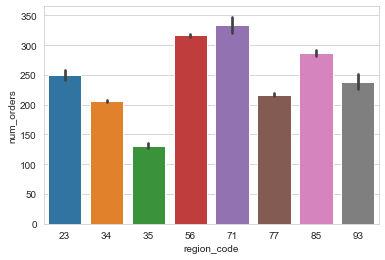

In [120]:
sns.barplot(df['region_code'],df["num_orders"])
plt.savefig("food-region.png")

In [ ]:
# Feature engineering

In [ ]:
# Lets load test dataset

In [5]:
testa=pd.read_csv("C://Users//acer//Desktop//1sem//python//Food Demand//test.csv")

In [ ]:
# Lets see test data

In [8]:
testa.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0


In [ ]:
# concat the additional dataset

In [6]:
testb=pd.merge(testa,dfb,on="meal_id")

In [7]:
fd=pd.merge(testb,dfc,on="center_id")

In [ ]:
# Lets look at the final test dataset

In [18]:
fd.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
# A detailed summary of test dataset

In [19]:
pd.DataFrame({"TotalMissing":fd.isna().sum(),"%Missing":fd.isna().mean(),"DataType":fd.dtypes,"Unique":fd.nunique()})

,TotalMissing,%Missing,DataType,Unique
id,0,0.0,int64,32573
week,0,0.0,int64,10
center_id,0,0.0,int64,77
meal_id,0,0.0,int64,51
checkout_price,0,0.0,float64,1397
base_price,0,0.0,float64,1179
emailer_for_promotion,0,0.0,int64,2
homepage_featured,0,0.0,int64,2
category,0,0.0,object,14
cuisine,0,0.0,object,4


In [ ]:
# shape of test dataset

In [20]:
fd.shape

(32573, 14)

In [ ]:
# cobining both dataset 

In [8]:
comb=pd.concat([df,fd],axis=0,sort=False)

In [ ]:
# Lets see the data

In [24]:
comb.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
# Null values

In [25]:
comb.isna().sum()

id                           0
week                         0
center_id                    0
meal_id                      0
checkout_price               0
base_price                   0
emailer_for_promotion        0
homepage_featured            0
num_orders               32573
category                     0
cuisine                      0
city_code                    0
region_code                  0
center_type                  0
op_area                      0
dtype: int64

In [ ]:
# creating new column discount

In [9]:
comb["discount"]=comb.base_price-comb.checkout_price

In [11]:
comb.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders               float64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
discount                 float64
dtype: object

In [ ]:
# Using label encoder to encode all categorical variables

In [12]:
from sklearn import preprocessing

In [15]:
le=preprocessing.LabelEncoder()
comb["category"]=le.fit_transform(comb["category"])

In [16]:
comb["cuisine"]=le.fit_transform(comb["cuisine"])
comb["center_type"]=le.fit_transform(comb["center_type"])

In [ ]:
# Lets see the dataset

In [17]:
comb.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,0,3,647,56,2,2.0,15.46
1,1018704,2,55,1885,135.83,152.29,0,0,323.0,0,3,647,56,2,2.0,16.46


In [ ]:
# Dataset look ready for modelling,lets split again into train and test dataset

In [22]:
df.shape

(456548, 15)

In [23]:
fd.shape

(32573, 14)

In [33]:
final_train=comb.iloc[:456548]

In [29]:
final_test=comb.iloc[456548:]

In [ ]:
# Lets change the datatype of target column 

In [30]:
final_train["num_orders"]=final_train["num_orders"].astype(int)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Lets divide train dataset into dependent and independent variables

In [38]:
y=final_train["num_orders"]
x=final_train.drop(["num_orders","id"],axis=1)

In [ ]:
# splitting dataset into train test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
# Displaying the shape of splitted dataset

In [43]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_train:",x_test.shape)
print("shape of x_train:",y_test.shape)

shape of x_train: (305887, 14)
shape of y_train: (305887,)
shape of x_train: (150661, 14)
shape of x_train: (150661,)


In [ ]:
# Lets apply ML algo 

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [46]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

64.90384406160348


In [48]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred=br.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

51.08677050774645


In [54]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


51.03965209774146


In [ ]:
# Lets use random forest for future prediction

In [ ]:
# Lets drop target column from test dataset

In [57]:
final_test.drop(["num_orders","id"],axis=1,inplace=True)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
rf=RandomForestRegressor()
rf.fit(x,y)
pred=rf.predict(final_test)
pred

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([102.4,  86.4, 109.1, ...,  43. ,  43. ,  43.3])

In [ ]:
# Converting predicted values in dataframe

In [59]:
submission=pd.DataFrame({"num_orders":pred})

In [ ]:
# Lets prepare our dataframe as asked for submission

In [60]:
final_df=pd.read_csv("C://Users//acer//Desktop//1sem//python//Food Demand//test.csv",usecols=["id"])

In [ ]:
# concat prediction of sales against ID

In [62]:
final_submission=pd.concat([final_df,submission],axis=1)

In [ ]:
# Converting result in csv

In [63]:
final_submission.to_csv("Food1.csv", index=False)

In [ ]:
# Thank you